# Nivell1
***Familiaritza't amb les tècniques d'exploració de les dades mitjantçant la estructura de dades, Dataframe amb la llibreria Pandas***

## Exercici 1
***Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.***

In [1]:
#Importem les llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns=None
pd.options.display.max_rows=30

In [53]:
def elim_outliners(in_df, min,max,columna):
    quantile1= in_df[columna].quantile(min)
    quantile3= in_df[columna].quantile(max)
    iqr = quantile3-quantile1 #Interquartile range
    rang_low  = quantile1-1.5*iqr
    rang_high = quantile3+1.5*iqr
    out_df = in_df.loc[(in_df[columna]> rang_low)&(in_df[columna]< rang_high)]
    return out_df

***Obrim el CSV separat alb comes,no hi ha un index i fem servir el encoding de defecte***


In [4]:
delayedFlightsDf=pd.read_csv('DelayedFlights_net.csv',index_col=0,sep=',', encoding='utf8')


C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


***Observem les columnes per decidir les que son significatives, max_colums=None***


In [5]:
delayedFlightsDf[:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,AvgSpeed,AvgSpeedFlight,Delayed
0,2008,1,3,4,2003.0,1955,2211.0,WN,335,128.0,116.0,-14.0,8.0,IAD,TPA,810,0,379.687500,418.965517,False
1,2008,1,3,4,754.0,735,1002.0,WN,3231,128.0,113.0,2.0,19.0,IAD,TPA,810,0,379.687500,430.088496,True
2,2008,1,3,4,628.0,620,804.0,WN,448,96.0,76.0,14.0,8.0,IND,BWI,515,0,321.875000,406.578947,True
4,2008,1,3,4,1829.0,1755,1959.0,WN,3920,90.0,77.0,34.0,34.0,IND,BWI,515,0,343.333333,401.298701,True
5,2008,1,3,4,1940.0,1915,2121.0,WN,378,101.0,87.0,11.0,25.0,IND,JAX,688,0,408.712871,474.482759,True
6,2008,1,3,4,1937.0,1830,2037.0,WN,509,240.0,230.0,57.0,67.0,IND,LAS,1591,0,397.750000,415.043478,True
10,2008,1,3,4,706.0,700,916.0,WN,100,130.0,106.0,1.0,6.0,IND,MCO,828,0,382.153846,468.679245,True
11,2008,1,3,4,1644.0,1510,1845.0,WN,1333,121.0,107.0,80.0,94.0,IND,MCO,828,0,410.578512,464.299065,True
15,2008,1,3,4,1029.0,1020,1021.0,WN,2272,52.0,37.0,11.0,9.0,IND,MDW,162,0,186.923077,262.702703,True
16,2008,1,3,4,1452.0,1425,1640.0,WN,675,228.0,213.0,15.0,27.0,IND,PHX,1489,0,391.842105,419.436620,True


***A partir del  describe veiem hi ha columnes contenen dades poc significatives SecurityDelay,CarrierDelay, etc***

In [6]:
delayedFlightsDf.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,AvgSpeed,AvgSpeedFlight
count,1917486.0,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1917486.0,1.917486e+06,1.917486e+06
mean,2008.0,6.109495e+00,1.575246e+01,3.985310e+00,1.518854e+03,1.468132e+03,1.610551e+03,2.173157e+03,1.336087e+02,1.086053e+02,4.198635e+01,4.299535e+01,7.684989e+02,0.0,3.164194e+02,3.980625e+02
std,0.0,3.479762e+00,8.775927e+00,1.996092e+00,4.505666e+02,4.247953e+02,5.483759e+02,1.938266e+03,7.208619e+01,6.865820e+01,5.657223e+01,5.316146e+01,5.735071e+02,0.0,8.901203e+01,7.384034e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,3.000000e+00,-7.000000e+01,6.000000e+00,3.100000e+01,0.0,1.808000e+01,1.800000e+02
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,6.080000e+02,8.000000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.420000e+02,0.0,2.568293e+02,3.529412e+02
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.716000e+03,1.537000e+03,1.160000e+02,9.100000e+01,2.400000e+01,2.400000e+01,6.100000e+02,0.0,3.228750e+02,4.043750e+02
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.901000e+03,1.817000e+03,2.031000e+03,3.402000e+03,1.650000e+02,1.380000e+02,5.500000e+01,5.300000e+01,9.990000e+02,0.0,3.806452e+02,4.484211e+02
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,9.741000e+03,7.900000e+02,7.330000e+02,2.461000e+03,2.467000e+03,4.962000e+03,0.0,6.456716e+02,7.000000e+02


***Mostrem els noms de les columnes per identificar mes facilment les que volem eliminar***


In [7]:
print(delayedFlightsDf.columns.values)

['Year' 'Month' 'DayofMonth' 'DayOfWeek' 'DepTime' 'CRSDepTime' 'ArrTime'
 'UniqueCarrier' 'FlightNum' 'ActualElapsedTime' 'AirTime' 'ArrDelay'
 'DepDelay' 'Origin' 'Dest' 'Distance' 'Cancelled' 'AvgSpeed'
 'AvgSpeedFlight' 'Delayed']


***Eliminem les columnes que no estem ineteressats, mantenim el mateix Dataframe***

In [10]:
delayedFlightsDf[:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,AvgSpeed,AvgSpeedFlight,Delayed
0,2008,1,3,4,2003.0,1955,2211.0,WN,335,128.0,116.0,-14.0,8.0,IAD,TPA,810,0,379.687500,418.965517,False
1,2008,1,3,4,754.0,735,1002.0,WN,3231,128.0,113.0,2.0,19.0,IAD,TPA,810,0,379.687500,430.088496,True
2,2008,1,3,4,628.0,620,804.0,WN,448,96.0,76.0,14.0,8.0,IND,BWI,515,0,321.875000,406.578947,True
4,2008,1,3,4,1829.0,1755,1959.0,WN,3920,90.0,77.0,34.0,34.0,IND,BWI,515,0,343.333333,401.298701,True
5,2008,1,3,4,1940.0,1915,2121.0,WN,378,101.0,87.0,11.0,25.0,IND,JAX,688,0,408.712871,474.482759,True
6,2008,1,3,4,1937.0,1830,2037.0,WN,509,240.0,230.0,57.0,67.0,IND,LAS,1591,0,397.750000,415.043478,True
10,2008,1,3,4,706.0,700,916.0,WN,100,130.0,106.0,1.0,6.0,IND,MCO,828,0,382.153846,468.679245,True
11,2008,1,3,4,1644.0,1510,1845.0,WN,1333,121.0,107.0,80.0,94.0,IND,MCO,828,0,410.578512,464.299065,True
15,2008,1,3,4,1029.0,1020,1021.0,WN,2272,52.0,37.0,11.0,9.0,IND,MDW,162,0,186.923077,262.702703,True
16,2008,1,3,4,1452.0,1425,1640.0,WN,675,228.0,213.0,15.0,27.0,IND,PHX,1489,0,391.842105,419.436620,True


***Observem tipus de dades , semblen massa generics***

In [11]:
delayedFlightsDf.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
UniqueCarrier         object
FlightNum              int64
ActualElapsedTime    float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
Cancelled              int64
AvgSpeed             float64
AvgSpeedFlight       float64
Delayed                 bool
dtype: object

## Exercici 2
***Fes un informe complet del data set:.***

***Resumeix estadísticament les columnes d’interès***
* Troba quantes dades faltants hi ha per columna
* Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
* Taula de les aerolínies amb més endarreriments acumulats
* Quins són els vols més llargs? I els més endarrerits?
* Etc.

### Resum estadistic de columnes

In [12]:
delayedFlightsDf.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,AvgSpeed,AvgSpeedFlight
count,1917486.0,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1.917486e+06,1917486.0,1.917486e+06,1.917486e+06
mean,2008.0,6.109495e+00,1.575246e+01,3.985310e+00,1.518854e+03,1.468132e+03,1.610551e+03,2.173157e+03,1.336087e+02,1.086053e+02,4.198635e+01,4.299535e+01,7.684989e+02,0.0,3.164194e+02,3.980625e+02
std,0.0,3.479762e+00,8.775927e+00,1.996092e+00,4.505666e+02,4.247953e+02,5.483759e+02,1.938266e+03,7.208619e+01,6.865820e+01,5.657223e+01,5.316146e+01,5.735071e+02,0.0,8.901203e+01,7.384034e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,3.000000e+00,-7.000000e+01,6.000000e+00,3.100000e+01,0.0,1.808000e+01,1.800000e+02
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,6.080000e+02,8.000000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.420000e+02,0.0,2.568293e+02,3.529412e+02
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.716000e+03,1.537000e+03,1.160000e+02,9.100000e+01,2.400000e+01,2.400000e+01,6.100000e+02,0.0,3.228750e+02,4.043750e+02
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.901000e+03,1.817000e+03,2.031000e+03,3.402000e+03,1.650000e+02,1.380000e+02,5.500000e+01,5.300000e+01,9.990000e+02,0.0,3.806452e+02,4.484211e+02
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,9.741000e+03,7.900000e+02,7.330000e+02,2.461000e+03,2.467000e+03,4.962000e+03,0.0,6.456716e+02,7.000000e+02


#### Valors nuls per columna

In [13]:
delayedFlightsDf.isnull().sum(axis=0)

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
Cancelled            0
AvgSpeed             0
AvgSpeedFlight       0
Delayed              0
dtype: int64

#### Mirem les dades de valors nuls

In [14]:
delayedFlightsDf[delayedFlightsDf.ActualElapsedTime.isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,AvgSpeed,AvgSpeedFlight,Delayed


#### Eliminem valors Nan i verifiquem que ja no en queden

In [15]:
delayedFlightsDf.dropna(inplace=True)

In [16]:
delayedFlightsDf[delayedFlightsDf.ActualElapsedTime.isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,AvgSpeed,AvgSpeedFlight,Delayed


### Afegir noves columnes y neteja adicional

#### Afegir velocitat mitjana total: AvgSpeed 

In [17]:
delayedFlightsDf['AvgSpeed']=delayedFlightsDf['Distance']*60/delayedFlightsDf['ActualElapsedTime']

In [18]:
delayedFlightsDf['AvgSpeed']

0          379.687500
1          379.687500
2          321.875000
4          343.333333
5          408.712871
              ...    
7009710    369.795918
7009717    227.244094
7009718    255.185185
7009726    278.086957
7009727    426.341463
Name: AvgSpeed, Length: 1917486, dtype: float64


#### Afegir velocitat mitjana en vol:  AvgSpeedFlight

In [19]:
delayedFlightsDf['AvgSpeedFlight']=delayedFlightsDf['Distance']*60/delayedFlightsDf['AirTime']

In [20]:
delayedFlightsDf['AvgSpeedFlight']

0          418.965517
1          430.088496
2          406.578947
4          401.298701
5          474.482759
              ...    
7009710    453.000000
7009717    370.000000
7009718    338.852459
7009726    359.325843
7009727    504.230769
Name: AvgSpeedFlight, Length: 1917486, dtype: float64

#### Vols amb retard True/False-Delayed

In [21]:
delayedDf=[]
dalayed =False
for delay in delayedFlightsDf['ArrDelay']:
    if delay >0:
        delayed=True
    else:
        delayed=False
    delayedDf.append(delayed)
   

In [22]:
delayedFlightsDf['Delayed']=delayedDf


#### Comprovem les dues columnes afegides***

In [24]:
delayedFlightsDf[:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,AvgSpeed,AvgSpeedFlight,Delayed
0,2008,1,3,4,2003.0,1955,2211.0,WN,335,128.0,116.0,-14.0,8.0,IAD,TPA,810,0,379.687500,418.965517,False
1,2008,1,3,4,754.0,735,1002.0,WN,3231,128.0,113.0,2.0,19.0,IAD,TPA,810,0,379.687500,430.088496,True
2,2008,1,3,4,628.0,620,804.0,WN,448,96.0,76.0,14.0,8.0,IND,BWI,515,0,321.875000,406.578947,True
4,2008,1,3,4,1829.0,1755,1959.0,WN,3920,90.0,77.0,34.0,34.0,IND,BWI,515,0,343.333333,401.298701,True
5,2008,1,3,4,1940.0,1915,2121.0,WN,378,101.0,87.0,11.0,25.0,IND,JAX,688,0,408.712871,474.482759,True
6,2008,1,3,4,1937.0,1830,2037.0,WN,509,240.0,230.0,57.0,67.0,IND,LAS,1591,0,397.750000,415.043478,True
10,2008,1,3,4,706.0,700,916.0,WN,100,130.0,106.0,1.0,6.0,IND,MCO,828,0,382.153846,468.679245,True
11,2008,1,3,4,1644.0,1510,1845.0,WN,1333,121.0,107.0,80.0,94.0,IND,MCO,828,0,410.578512,464.299065,True
15,2008,1,3,4,1029.0,1020,1021.0,WN,2272,52.0,37.0,11.0,9.0,IND,MDW,162,0,186.923077,262.702703,True
16,2008,1,3,4,1452.0,1425,1640.0,WN,675,228.0,213.0,15.0,27.0,IND,PHX,1489,0,391.842105,419.436620,True


***Checking de velocitats , velocitats <180 0 > 700 mph np son realistas***

In [25]:
delayedFlightsDf[(delayedFlightsDf.AvgSpeedFlight>700) | (delayedFlightsDf.AvgSpeedFlight<180)].loc[:,['AirTime', 'Distance','AvgSpeedFlight']].sort_values('Distance',ascending=False)

,AirTime,Distance,AvgSpeedFlight


***Eliminem els vols de velocitats no coherents 10885 files***

In [26]:
delayedFlightsDf.drop(delayedFlightsDf[((delayedFlightsDf['AvgSpeedFlight']>700) | (delayedFlightsDf['AvgSpeedFlight']<180))].index,inplace=True)

### Consultes varies


#### companyies en major retard acumulat

In [27]:
delayedFlightsDf.loc[:,['UniqueCarrier','ArrDelay']].groupby('UniqueCarrier').sum().sort_values('ArrDelay',ascending=False).head(5)

,ArrDelay
UniqueCarrier,
WN,11279776.0
AA,8876420.0
UA,6721559.0
MQ,6266705.0
OO,5751242.0


***Grafic barres retard acuymulat per companyia***

<BarContainer object of 20 artists>

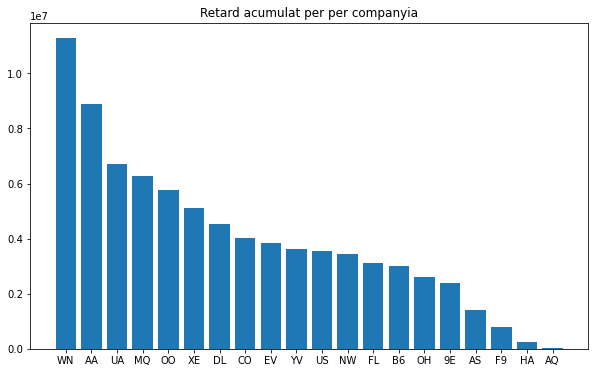

In [40]:
plt.figure(figsize =(10, 6))
delayedDF=delayedFlightsDf.loc[:,['UniqueCarrier','ArrDelay']].groupby('UniqueCarrier').sum().sort_values('ArrDelay',ascending=False).copy()
plt.title('Retard acumulat per per companyia')
plt.xlabel=('Companyia')
plt.ylabel=('Retard Acumulat (min)')
plt.bar(delayedDF.index,delayedDF['ArrDelay'])
plt.show()



#### Vols per companyia

In [31]:
delayedFlightsDf.groupby(['UniqueCarrier']).size().reset_index(name='counts').sort_values('counts',ascending=False).head(10)

,UniqueCarrier,counts
17,WN,375883
1,AA,190800
15,UA,140797
11,MQ,139688
14,OO,128481
6,DL,113577
18,XE,102537
5,CO,99458
16,US,97641
7,EV,81058


***Grafic pie  vols per companyia***

Text(0.5, 1.0, '% Nombre de vols')

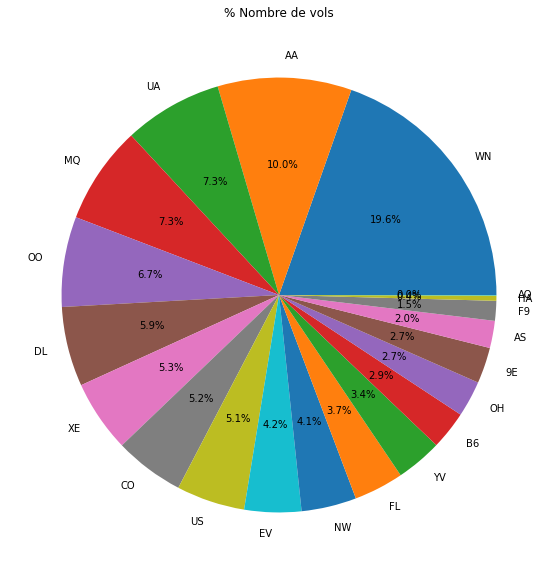

In [42]:

plt.figure(figsize=(15,10))
numVolsDf=delayedFlightsDf['UniqueCarrier'].value_counts().copy()
plt.pie(numVolsDf,autopct='%1.1f%%',labels=numVolsDf.index)
plt.title('% Nombre de vols')

***Vols per companyia - Diagrama barres***

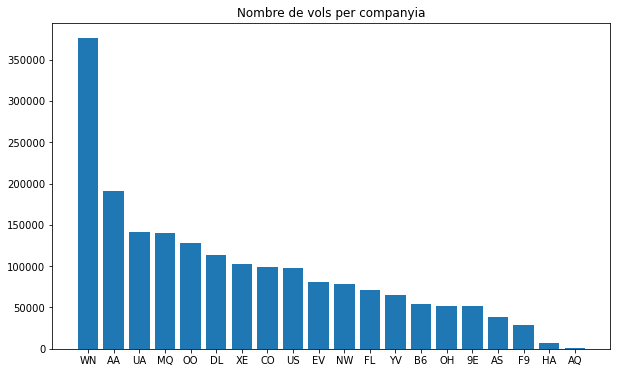

In [28]:
plt.figure(figsize =(10, 6))
numVolsDf=delayedFlightsDf['UniqueCarrier'].value_counts().copy()
plt.title('Nombre de vols per companyia')
plt.xlabel=('Companyia')
plt.ylabel=('Nombre vols')
plt.bar(numVolsDf.index,numVolsDf)
plt.show()

#### Vols mes llargs agrupament per Origin i Desti-Dades

In [55]:
volsllargsDF=delayedFlightsDf.loc[:,['Origin','Dest','Distance']].groupby(['Origin','Dest']).max().sort_values('Distance',ascending=False)
volsllargsDF.head(10)

Distance
Origin Dest          
EWR    HNL       4962
HNL    EWR       4962
       ATL       4502
ATL    HNL       4502
HNL    ORD       4243
ORD    HNL       4243
KOA    ORD       4213
ORD    OGG       4184
MSP    HNL       3972
HNL    MSP       3972

<AxesSubplot:title={'center':'Vols mes curts per trajecte'}, xlabel='Origin,Dest', ylabel='Distancia'>

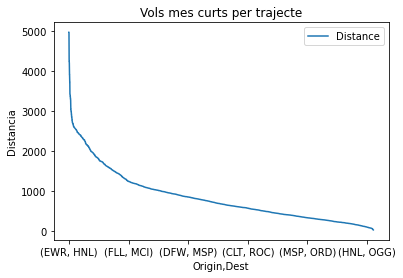

In [56]:
volsllargsDF.plot(title="Vols mes llargs per trajecte",ylabel="Distancia")

#### Vols mes curst agrupament per Origin i Desti-Dades

In [46]:
volsCurtsDf=delayedFlightsDf.loc[:,['Origin','Dest','Distance']].groupby(['Origin','Dest']).max().sort_values('Distance',ascending=True)
volsCurtsDf.head(10)

,,Distance
Origin,Dest,
WRG,PSG,31
PSG,WRG,31
HPN,EWR,35
LAX,SNA,36
PUB,COS,37
SRQ,TPA,40
GST,JNU,41
JNU,GST,41
MKG,GRR,41


<AxesSubplot:title={'center':'Vols mes llargs per traajecte'}, xlabel='Origin,Dest', ylabel='Distancia'>

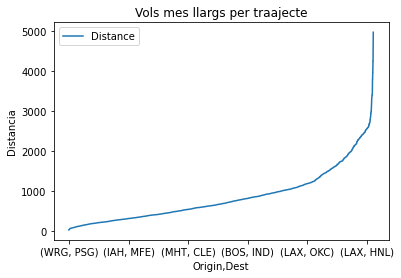

In [49]:
volsCurtsDf.plot(title="Vols mes llargs per traajecte",ylabel="Distancia")

#### Vols mes ràpids

In [51]:
maxAvgSpeed=delayedFlightsDf.loc[:,['Origin','Dest','AvgSpeedFlight']].groupby(['Origin','Dest']).max().sort_values('AvgSpeedFlight',ascending=False).copy()

<AxesSubplot:title={'center':'Velocitat mitja per trajecte'}, xlabel='Origin,Dest', ylabel='Velocitat mitja'>

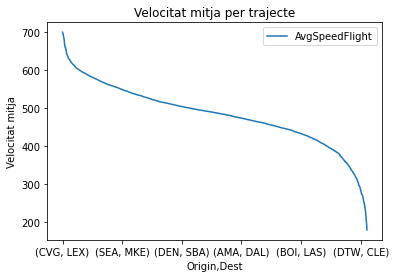

In [52]:
maxAvgSpeed.plot(title="Velocitat mitja per trajecte",ylabel="Velocitat mitja")

#### Mediana I media  de la velocitat dels vols dona un valor mes aproximat

In [35]:
delayedFlightsDf['AvgSpeedFlight'].median()

404.375

In [36]:
delayedFlightsDf['AvgSpeedFlight'].mean()

398.06250611232065

## Exercici 3
***Exporta el data set net i amb les noves columnes a CSV complert i a excel filtrat per companyia WN/AA Excel.***

In [37]:
delayedFlightsDf.to_csv('DelayedFlights_net.csv')

In [38]:
delayedFlightsDf[((delayedFlightsDf.UniqueCarrier=='WN')| (delayedFlightsDf.UniqueCarrier=='AA'))].to_excel('DelayedFlights_net.xlsx')